# Setup

In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [15]:
df = pd.read_csv("dataframes/cleaned_dataframe.csv")

## Drop variables, which have no insights for further research

In [16]:
df = df.drop (["project_ID","subcategory","category_ID","creator_ID","spotlight",
               "created_at","launched_at","state_changed_at","deadline","goal_reached_time"],axis=1)

In [17]:
df.head(5)

,state,converted_pledged_amount,goal_usd,backers_count,currency,len_of_name,len_of_description,metacategory,country,is_starrable,staff_pick,creation_time_to_launch,planned_time
0,live,28645,28000.000,315,USD,24,13,fashion,US,False,False,1878.936,1199.000
1,successful,1950,1000.000,47,USD,23,125,games,US,False,False,194.546,720.000
2,successful,22404,15000.000,271,USD,51,108,music,US,False,False,5398.295,720.000
3,failed,165,12160.657,3,GBP,34,133,games,GB,False,False,129.196,1439.000
4,successful,2820,2800.000,3,USD,40,121,publishing,US,False,False,98.460,720.000


##### Todos
- preprocess data with minmax scaler or robust scaler?
- metacategory one hot encoden
- currency one hot encoden
- country one hot encoden
- wochentage herausfiltern
- staff_pick 0 -1 machen

In [18]:
df.shape

(182220, 13)

In [23]:
df_encoded = df[df["state"]!="live"]
print(df_encoded.shape)
df_encoded = df_encoded[df_encoded["state"]!="canceled"]
print(df_encoded.shape)
df_encoded = df_encoded[df_encoded["state"]!="suspended"]
print(df_encoded.shape)
df.dtypes

(178218, 13)
(169600, 13)
(168977, 13)


state                        object
converted_pledged_amount      int64
goal_usd                    float64
backers_count                 int64
currency                     object
len_of_name                   int64
len_of_description            int64
metacategory                 object
country                      object
is_starrable                   bool
staff_pick                     bool
creation_time_to_launch     float64
planned_time                float64
dtype: object

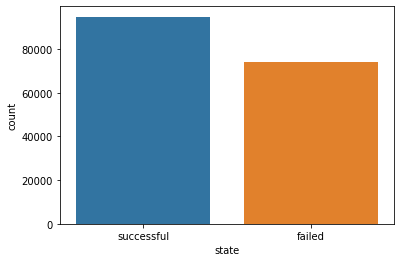

In [22]:
sns.countplot(x="state", data=df_encoded)

# Extract Months and Weekday

In [7]:
# convert launch date to timestamp
df_encoded['launched_at'] = pd.to_datetime(df_encoded['launched_at'],unit='s')
df_encoded


,state,converted_pledged_amount,goal_usd,backers_count,currency,len_of_name,len_of_description,metacategory,country,is_starrable,staff_pick,launched_at,creation_time_to_launch,planned_time
1,successful,1950,1000.000,47,USD,23,125,games,US,False,False,2017-08-10 17:00:59,194.546,720.000
2,successful,22404,15000.000,271,USD,51,108,music,US,False,False,2013-05-13 05:03:15,5398.295,720.000
3,failed,165,12160.657,3,GBP,34,133,games,GB,False,False,2017-01-12 18:22:56,129.196,1439.000
4,successful,2820,2800.000,3,USD,40,121,publishing,US,False,False,2012-12-10 20:32:07,98.460,720.000
5,successful,3725,3500.000,35,USD,31,134,music,US,False,False,2015-04-02 02:25:46,3824.832,720.000
6,successful,3890,2500.000,71,USD,51,123,music,US,False,False,2013-09-11 23:07:29,261.915,722.075
7,successful,660,400.000,33,USD,51,135,music,US,False,True,2019-01-14 14:15:05,141.617,720.000
8,successful,540,529.787,14,GBP,11,135,theater,GB,False,False,2016-04-12 13:56:24,458.594,681.060
9,successful,2552,489.325,76,GBP,50,55,fashion,GB,False,False,2019-01-21 13:00:01,278.915,720.000
10,failed,0,150000.000,0,USD,36,41,food,US,False,False,2016-09-15 04:01:45,1.236,720.000


In [8]:
df_encoded["weekday_launched"] = df_encoded["launched_at"].dt.dayofweek
df_encoded["month_launched"] = df_encoded["launched_at"].dt.month
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].astype(str)
df_encoded["month_launched"] = df_encoded["month_launched"].astype(str)
df_encoded

,state,converted_pledged_amount,goal_usd,backers_count,currency,len_of_name,len_of_description,metacategory,country,is_starrable,staff_pick,launched_at,creation_time_to_launch,planned_time,weekday_launched,month_launched
1,successful,1950,1000.000,47,USD,23,125,games,US,False,False,2017-08-10 17:00:59,194.546,720.000,3,8
2,successful,22404,15000.000,271,USD,51,108,music,US,False,False,2013-05-13 05:03:15,5398.295,720.000,0,5
3,failed,165,12160.657,3,GBP,34,133,games,GB,False,False,2017-01-12 18:22:56,129.196,1439.000,3,1
4,successful,2820,2800.000,3,USD,40,121,publishing,US,False,False,2012-12-10 20:32:07,98.460,720.000,0,12
5,successful,3725,3500.000,35,USD,31,134,music,US,False,False,2015-04-02 02:25:46,3824.832,720.000,3,4
6,successful,3890,2500.000,71,USD,51,123,music,US,False,False,2013-09-11 23:07:29,261.915,722.075,2,9
7,successful,660,400.000,33,USD,51,135,music,US,False,True,2019-01-14 14:15:05,141.617,720.000,0,1
8,successful,540,529.787,14,GBP,11,135,theater,GB,False,False,2016-04-12 13:56:24,458.594,681.060,1,4
9,successful,2552,489.325,76,GBP,50,55,fashion,GB,False,False,2019-01-21 13:00:01,278.915,720.000,0,1
10,failed,0,150000.000,0,USD,36,41,food,US,False,False,2016-09-15 04:01:45,1.236,720.000,3,9


In [9]:
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("0","Monday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("1","Tuesday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("2","Wednesday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("3","Thursday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("4","Friday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("5","Saturday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("6","Sunday")

df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("12","December")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("11","November")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("10","October")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("1","January")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("2","February")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("3","March")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("4","April")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("5","May")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("6","June")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("7","July")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("8","August")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("9","September")


df_encoded = df_encoded.drop (["launched_at"],axis=1)
df_encoded.head()

,state,converted_pledged_amount,goal_usd,backers_count,currency,len_of_name,len_of_description,metacategory,country,is_starrable,staff_pick,creation_time_to_launch,planned_time,weekday_launched,month_launched
1,successful,1950,1000.000,47,USD,23,125,games,US,False,False,194.546,720.000,Thursday,August
2,successful,22404,15000.000,271,USD,51,108,music,US,False,False,5398.295,720.000,Monday,May
3,failed,165,12160.657,3,GBP,34,133,games,GB,False,False,129.196,1439.000,Thursday,January
4,successful,2820,2800.000,3,USD,40,121,publishing,US,False,False,98.460,720.000,Monday,December
5,successful,3725,3500.000,35,USD,31,134,music,US,False,False,3824.832,720.000,Thursday,April


In [ ]:
# Extract Months and Weekday

# convert launch date to timestamp
df_encoded['launched_at'] = pd.to_datetime(df_encoded['launched_at'],unit='s')
df_encoded


df_encoded["weekday_launched"] = df_encoded["launched_at"].dt.dayofweek
df_encoded["month_launched"] = df_encoded["launched_at"].dt.month
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].astype(str)
df_encoded["month_launched"] = df_encoded["month_launched"].astype(str)
df_encoded

df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("0","Monday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("1","Tuesday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("2","Wednesday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("3","Thursday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("4","Friday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("5","Saturday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("6","Sunday")

df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("12","December")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("11","November")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("10","October")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("1","January")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("2","February")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("3","March")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("4","April")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("5","May")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("6","June")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("7","July")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("8","August")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("9","September")


df_encoded = df_encoded.drop (["launched_at"],axis=1)
df_encoded.head()



# Experimental Zone

Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding platform. It has an all-or-nothing funding model, whereby a project is only funded if it meets its goal amount; otherwise no money is given by backers to a project.
A huge variety of factors contribute to the success or failure of a project — in general, and also on Kickstarter. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not. The aim of this project is to construct such a model and also to analyse Kickstarter project data more generally, in order to help potential project creators assess whether or not Kickstarter is a good funding option for them, and what their chances of success are.

<br>

whether or not Kickstarter is a good funding option for them --> depends on category, hopefully

<br>

their chances of success are --> mehrere beispiele durchspielen

##### Shorten dataframe?

In [14]:
df_exp = df.copy()

In [23]:
df_exp = df_exp.query("goal_usd >= 5000 and goal_usd < 100000")
df_exp.shape

(87482, 13)

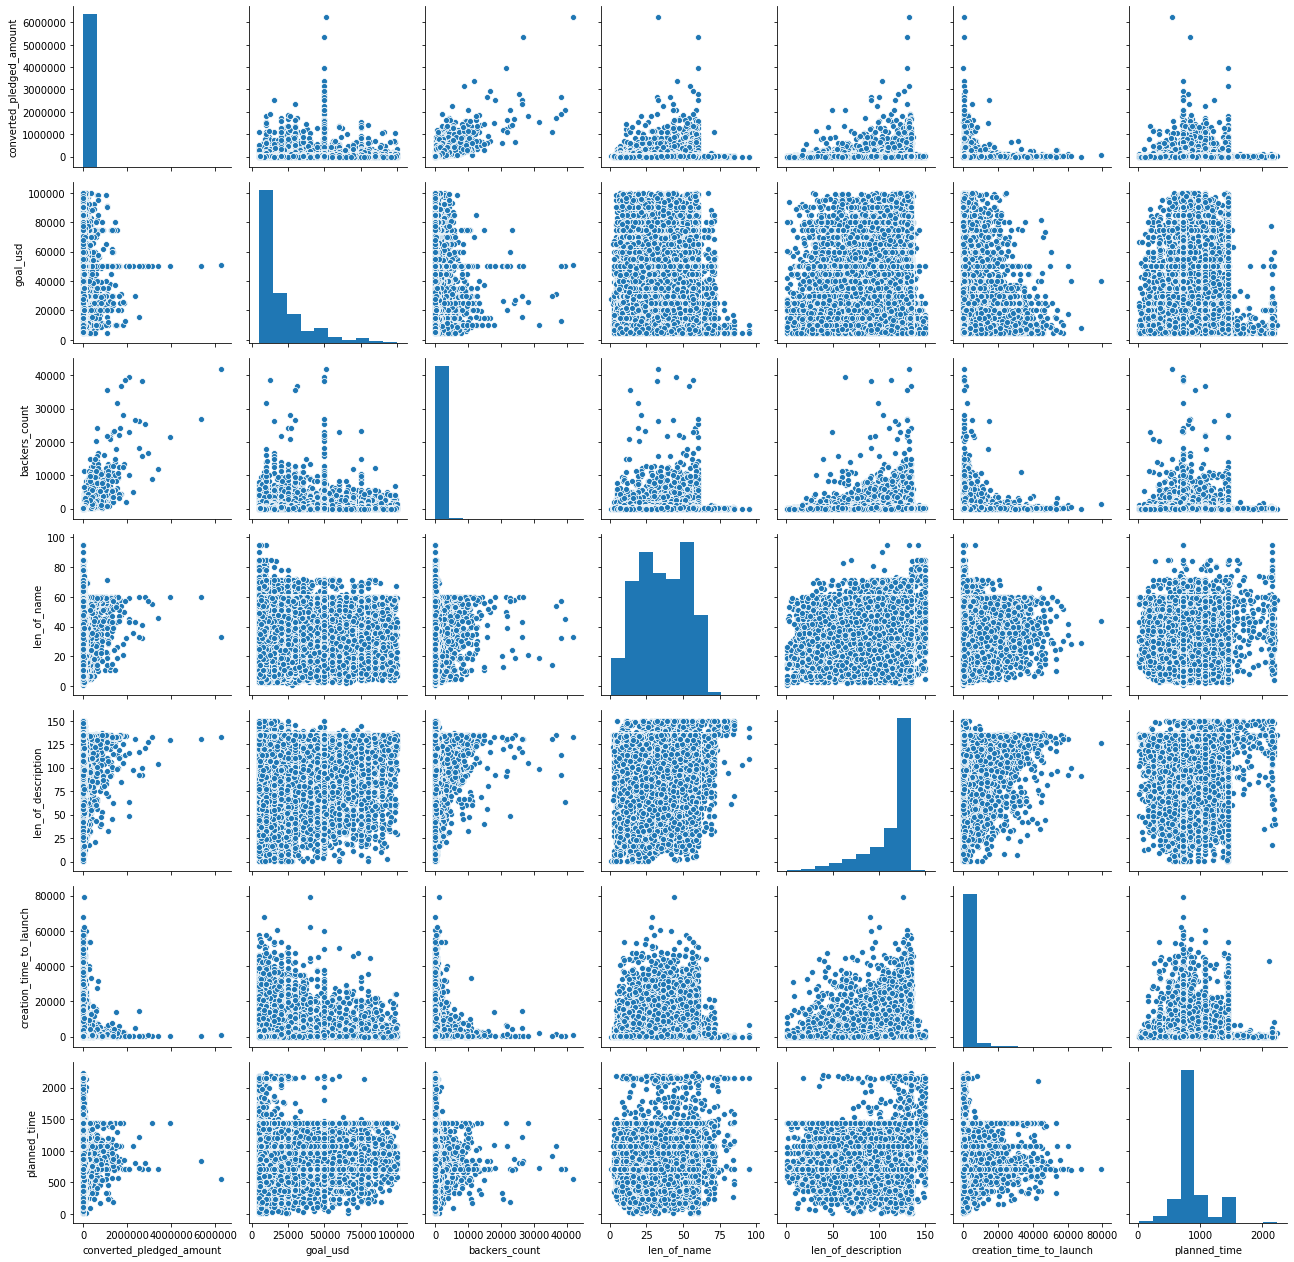

In [22]:
df_exp_num = df_exp[["converted_pledged_amount","goal_usd","backers_count","len_of_name","len_of_description",
                     "creation_time_to_launch","planned_time"]]
                    
sns.pairplot(df_exp_num)